In [20]:
import pandas as pd
import matplotlib.pyplot as plt
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "modelyear", "origin", "carname"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
print(cars.head(10))

    mpg  cylinders  displacement horsepower  weight  acceleration  modelyear  \
0  18.0          8         307.0      130.0  3504.0          12.0         70   
1  15.0          8         350.0      165.0  3693.0          11.5         70   
2  18.0          8         318.0      150.0  3436.0          11.0         70   
3  16.0          8         304.0      150.0  3433.0          12.0         70   
4  17.0          8         302.0      140.0  3449.0          10.5         70   
5  15.0          8         429.0      198.0  4341.0          10.0         70   
6  14.0          8         454.0      220.0  4354.0           9.0         70   
7  14.0          8         440.0      215.0  4312.0           8.5         70   
8  14.0          8         455.0      225.0  4425.0          10.0         70   
9  15.0          8         390.0      190.0  3850.0           8.5         70   

   origin                    carname  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2 

In [21]:
df=pd.DataFrame(cars)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   carname       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [23]:
#df.carname.uniquen()
df.carname.drop_duplicates()# 去重

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: carname, Length: 305, dtype: object

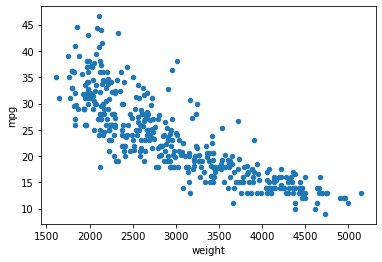

In [14]:
df.plot("weight", "mpg", kind='scatter')

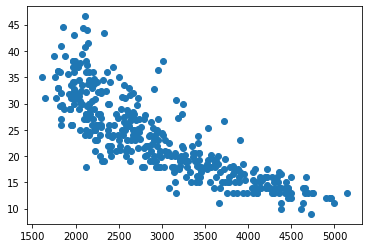

In [18]:
plt.scatter(df.weight,df.mpg)

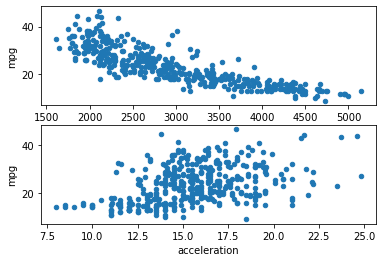

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot("weight", "mpg", kind='scatter', ax=ax1)
cars.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.show()

In [29]:
df["weight"]

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 398, dtype: float64

In [30]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cars[["weight"]], cars["mpg"])

LinearRegression()

In [40]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(cars[["weight","displacement"]], cars["mpg"])
predictions = lr.predict(cars[["weight","displacement"]])
print(predictions[0:5])
print(cars["mpg"][0:5])

[18.56315378 16.76397095 18.7774585  19.02386868 18.96382147]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


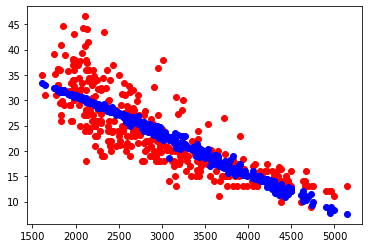

In [41]:
plt.scatter(cars["weight"], cars["mpg"], c='red')
plt.scatter(cars["weight"], predictions, c='blue')
plt.show()

In [47]:
lr = LinearRegression()
lr.fit(cars[["weight"]], cars["mpg"])
predictions = lr.predict(cars[["weight"]])
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars["mpg"], predictions)
print(mse)

18.780939734628397


In [46]:
mse = mean_squared_error(cars["mpg"], predictions)
rmse = mse ** (0.5)
print (rmse)

4.290004770826327
